In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [3]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_test)

10000

In [5]:
len(X_train)

60000

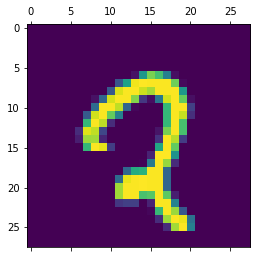

In [188]:
plt.matshow(X_train[854])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [10]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [181]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')])

model.compile(

    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    
    metrics = ['accuracy']

)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9856 - accuracy: 0.8701
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2436 - accuracy: 0.9551
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0967 - accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9896
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.030

In [182]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9740


[0.09566504508256912, 0.9739999771118164]

(28, 28)


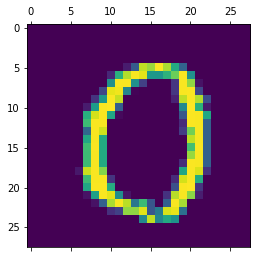

In [190]:
plt.matshow(X_test[854])
print((X_test[854].shape))

In [184]:
y_predicted = model.predict(X_test_flattened)
#print(type(X_test_flattened))
y_predicted.shape

(10000, 10)

In [185]:
y_predicted[854]

array([4.49908942e-01, 1.37558579e-03, 1.44213438e-04, 4.35161894e-07,
       1.40249729e-04, 1.29765385e-06, 2.75504754e-05, 2.68266831e-05,
       1.14545415e-04, 1.48445368e-04], dtype=float32)

In [189]:
np.argmax(y_predicted[854])

0

In [187]:
y_predicted_labled = [np.argmax(y_predicted[i]) for i in range(len(y_test))]
#or y_predicted_labled = [np.argmax(i) for i in y_predicted]

In [34]:
y_predicted_labled = np.array(y_predicted_labled)

In [37]:
mat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labled)
mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    2,    1,    0,    2,    1,    3,    0],
       [   0, 1121,    4,    1,    0,    1,    4,    1,    3,    0],
       [   6,    1,  993,    2,    3,    0,    2,   16,    8,    1],
       [   1,    1,    3,  978,    2,    5,    0,    6,    6,    8],
       [   2,    0,    0,    0,  955,    0,    8,    5,    0,   12],
       [   3,    0,    0,    5,    1,  868,    4,    3,    5,    3],
       [   5,    2,    1,    1,    5,    2,  938,    0,    4,    0],
       [   1,    1,    5,    0,    0,    0,    0, 1015,    2,    4],
       [   5,    0,    4,    1,    3,    3,    4,    9,  942,    3],
       [   0,    2,    0,    2,    6,    2,    0,    9,    1,  987]])>

Text(69.0, 0.5, 'Asli Sach!!!')

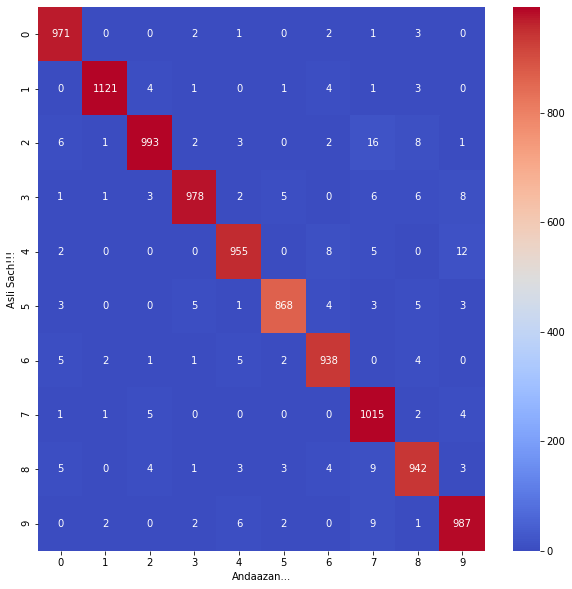

In [44]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(mat, annot=True, fmt='d', cmap='coolwarm', robust=True)
plt.xlabel('Andaazan...')
plt.ylabel('Asli Sach!!!')

In [57]:
from PIL import Image
from numpy import asarray

In [173]:
image = Image.open('image_predict.png')

In [174]:
data = asarray(image)/255
print(data)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.01960784 0.14509804 0.48235294 0.8
  0.92941176 0.98823529 0.97254902 0.85490196]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.03921569 0.25882353 0.63137255 0.96862745
  0.98431373 0.98039216 0.89803922 0.74901961]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01568627 0.12156863 0.69803922 0.89411765 0.99215686
  0.99607843 0.9254902  0.48627451 0.33333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

In [175]:
print(data.shape)

(28, 28)


In [176]:
data = data.reshape(1,784)
data.shape

(1, 784)

In [177]:
y_predicted = model.predict(data)
#print(type(X_test_flattened))
y_predicted.shape

(1, 10)

In [178]:
y_predicted

array([[2.6765382e-14, 8.2125426e-09, 1.5654012e-13, 7.8583309e-09,
        3.5508901e-08, 2.0059186e-15, 1.1494351e-06, 2.2256205e-07,
        1.9751942e-06, 3.6537028e-13]], dtype=float32)

In [179]:
np.argmax(y_predicted)

8